In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [48]:
# Load the dataset
df = pd.read_csv("./heart.csv")

In [49]:
# checking sample data few rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [50]:
# Data 
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [51]:
#Check the shape of the data
df.shape

(918, 12)

In [52]:
# Check for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

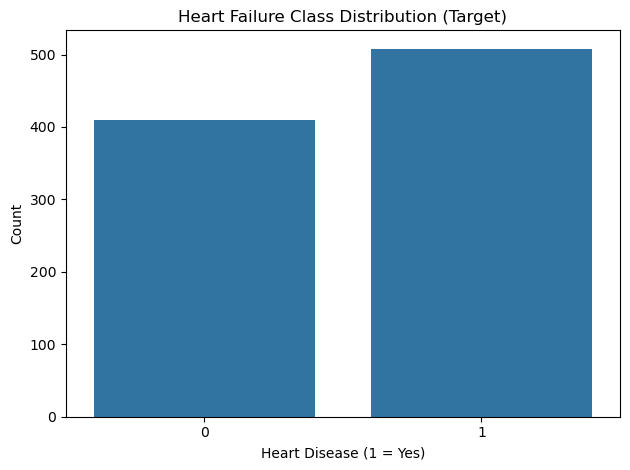

In [100]:
# Plot class distribution
sns.countplot(data=df, x='HeartDisease')
plt.title('Heart Failure Class Distribution (Target)')
plt.xlabel('Heart Disease (1 = Yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [53]:
#Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include="object").columns.tolist()
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [8]:
print(numerical_cols)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [54]:
print(categorical_cols)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [55]:
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Sex
['M' 'F']

Column: ChestPainType
['ATA' 'NAP' 'ASY' 'TA']

Column: RestingECG
['Normal' 'ST' 'LVH']

Column: ExerciseAngina
['N' 'Y']

Column: ST_Slope
['Up' 'Flat' 'Down']


In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'F': 0, 'M': 1}


In [12]:
# ChestPainType
#ATA - Atypical Angina - Chest pain not related to exertion; may not indicate heart disease.
#NAP - Non-Anginal Pain - Chest pain not related to the heart, typically gastrointestinal or musculoskeletal.
#ASY - Asymptomatic - No chest pain, but other signs (like abnormal ECG) may be present. Often found in high-risk patients.
#TA - Typical Angina - Classic exertional chest pain related to coronary artery disease (CAD). Predictable and reproducible.

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ChestPainType_encoded'] = le.fit_transform(df['ChestPainType'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}


In [14]:
#RestingECG
#Normal - Normal ECG - Heart rhythm and conduction are within normal limits.
#ST - ST-T Wave Abnormality - Indicates possible myocardial ischemia (reduced blood flow to heart). Could suggest problems like angina or past heart attack.
#LVH - Left Ventricular Hypertrophy Thickening of the left ventricleâ€™s wall, often due to high blood pressure or heart disease. Can be a sign of long-term cardiac stress.

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['RestingECG_encoded'] = le.fit_transform(df['RestingECG'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'LVH': 0, 'Normal': 1, 'ST': 2}


In [16]:
#ExerciseAngina
#No - The patient did not experience angina during exercise.
#Yes - The patient did experience angina during exercise, which may suggest obstructed blood flow or coronary artery disease (CAD).

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ExerciseAngina_encoded'] = le.fit_transform(df['ExerciseAngina'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'N': 0, 'Y': 1}


In [18]:
#ST_Slope (Slope of the Peak Exercise ST Segment)
#Upsloping - Usually considered normal â€” heart is responding well to stress.
#Flat ST segment - Could indicate myocardial ischemia â€” a warning sign for coronary artery disease.
#Downsloping - More strongly associated with abnormal stress test results, especially in patients with angina or blocked arteries.

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['ST_Slope_encoded'] = le.fit_transform(df['ST_Slope'])
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Down': 0, 'Flat': 1, 'Up': 2}


In [61]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_encoded,ChestPainType_encoded,RestingECG_encoded,ExerciseAngina_encoded,ST_Slope_encoded
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1,1,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2,1,0,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1,2,0,2
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0,1,1,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2,1,0,2


In [62]:
df_heart = df[['Age', 'Sex_encoded','ChestPainType_encoded', 'RestingBP', 'Cholesterol', 
               'FastingBS','RestingECG_encoded','MaxHR', 'ExerciseAngina_encoded','Oldpeak','ST_Slope_encoded','HeartDisease']]

In [63]:
df_heart.head()

,Age,Sex_encoded,ChestPainType_encoded,RestingBP,Cholesterol,FastingBS,RestingECG_encoded,MaxHR,ExerciseAngina_encoded,Oldpeak,ST_Slope_encoded,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


/var/folders/6k/cg0nwpvd78x_55ng32vylz500000gn/T/ipykernel_34288/2425213959.py:5: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


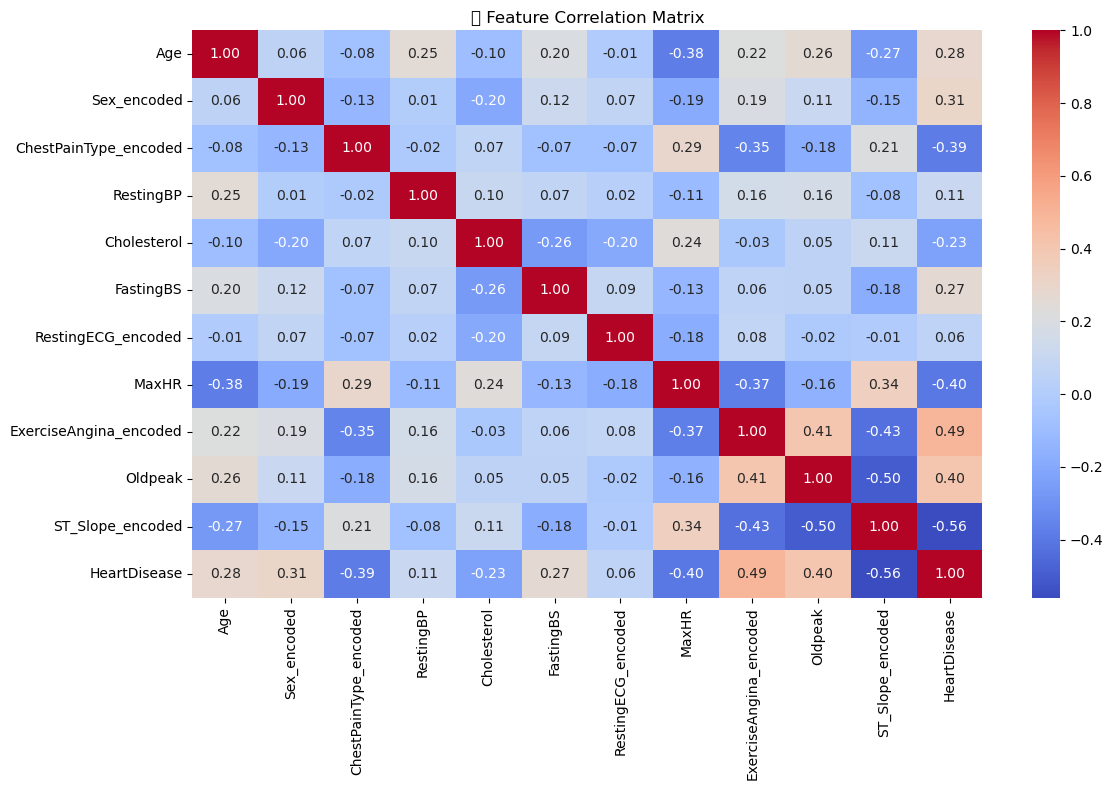

In [102]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_heart.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("🔗 Feature Correlation Matrix")
plt.tight_layout()
plt.show()

/var/folders/6k/cg0nwpvd78x_55ng32vylz500000gn/T/ipykernel_34288/3255363421.py:4: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


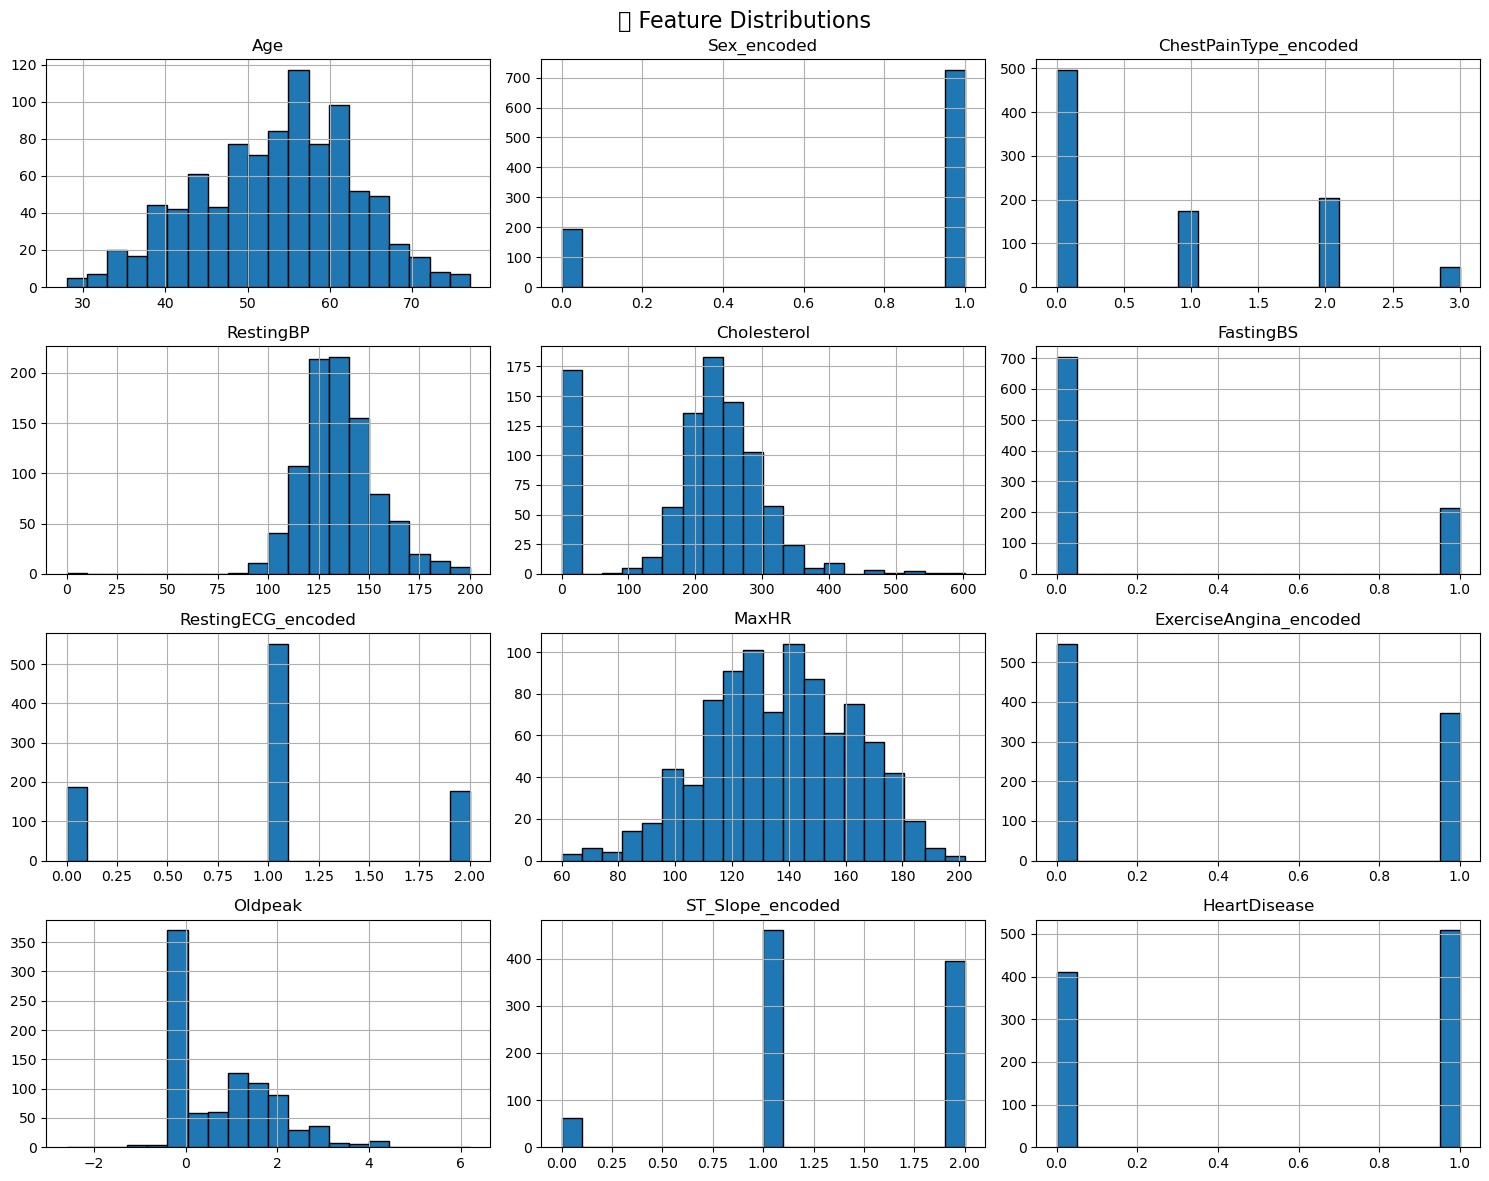

In [103]:
# Histograms of all features
df_heart.hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("📊 Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

In [64]:
# Train-test split
X = df_heart[['Age', 'Sex_encoded','ChestPainType_encoded', 'RestingBP', 'Cholesterol', 
               'FastingBS','RestingECG_encoded','MaxHR', 'ExerciseAngina_encoded','Oldpeak','ST_Slope_encoded']]
y = df_heart["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [65]:
X.shape, y.shape,X_train.shape,y_train.shape, X_test.shape, y_test.shape

((918, 11), (918,), (734, 11), (734,), (184, 11), (184,))

In [66]:
X_train.head()

,Age,Sex_encoded,ChestPainType_encoded,RestingBP,Cholesterol,FastingBS,RestingECG_encoded,MaxHR,ExerciseAngina_encoded,Oldpeak,ST_Slope_encoded
485,63,1,1,139,217,1,2,128,1,1.2,1
486,55,1,1,110,214,1,2,180,0,0.4,2
117,59,0,0,130,338,1,2,130,1,1.5,1
361,47,1,0,160,0,0,1,124,1,0.0,1
296,50,1,0,145,0,1,1,139,1,0.7,1


In [67]:
X_test.head()

,Age,Sex_encoded,ChestPainType_encoded,RestingBP,Cholesterol,FastingBS,RestingECG_encoded,MaxHR,ExerciseAngina_encoded,Oldpeak,ST_Slope_encoded
356,46,1,0,115,0,0,1,113,1,1.5,1
763,58,1,2,132,224,0,0,173,0,3.2,2
817,60,1,0,125,258,0,0,141,1,2.8,1
735,49,1,2,120,188,0,1,139,0,2.0,1
892,39,0,2,138,220,0,1,152,0,0.0,1


In [68]:
#Scale numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# Check class distribution in the target
class_counts = y.value_counts()
class_ratio = y.value_counts(normalize=True)

print("Class Counts:\n", class_counts)
print("\nClass Proportions:\n", class_ratio)

Class Counts:
 HeartDisease
1    508
0    410
Name: count, dtype: int64

Class Proportions:
 HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
# Initialize and train the model
model = RandomForestClassifier(class_weight='balanced',random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [72]:
# Predict labels and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

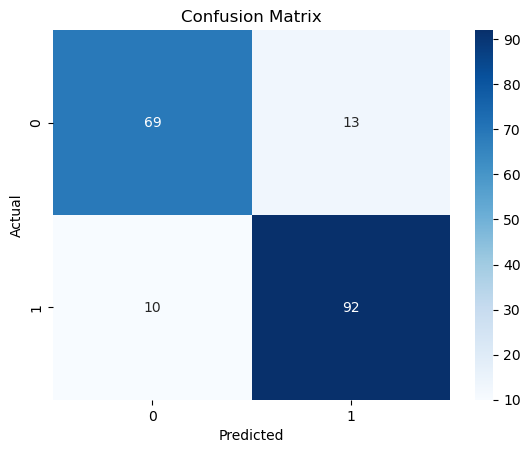

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86        82
           1       0.88      0.90      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

ROC-AUC Score: 0.923


In [73]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", round(roc_auc, 3))

In [74]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_sm))

After SMOTE: Counter({1: 406, 0: 406})


In [75]:
# Initialize and train the model
model = RandomForestClassifier(class_weight='balanced',random_state=42)
model.fit(X_train_sm, y_train_sm)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [76]:
# Predict labels and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

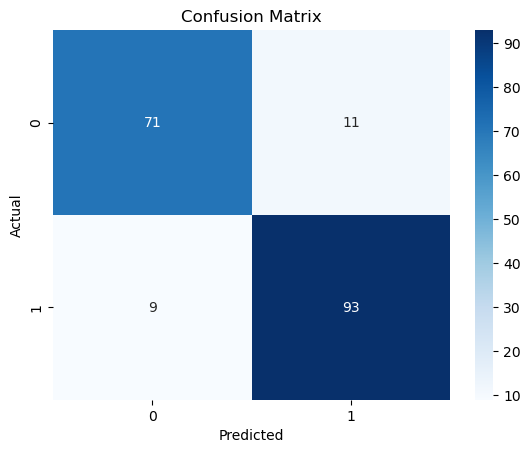

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

ROC-AUC Score: 0.932


In [77]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", round(roc_auc, 3))

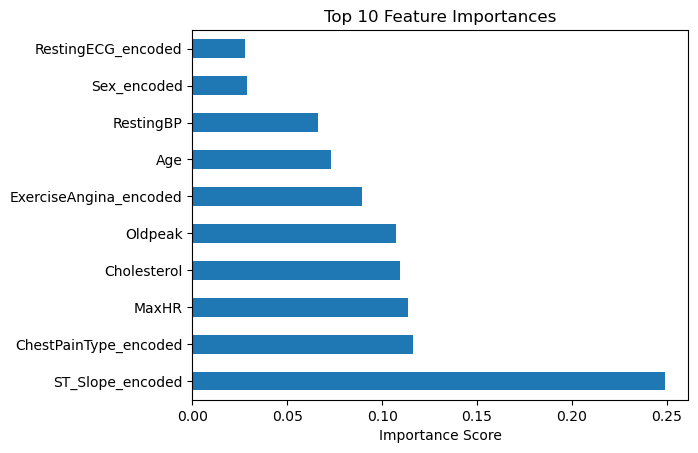

In [81]:
# Feature Importance
import matplotlib.pyplot as plt

# If you know the original feature names
feature_names = ['Age', 'Sex_encoded','ChestPainType_encoded', 'RestingBP', 'Cholesterol', 
               'FastingBS','RestingECG_encoded','MaxHR', 'ExerciseAngina_encoded','Oldpeak','ST_Slope_encoded']  
# Create a Series with correct index
importances = pd.Series(model.feature_importances_, index=feature_names)

# Plot top 10
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

In [ ]:
#### XGBoost

In [82]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:38:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [83]:
# Predict labels and probabilities
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

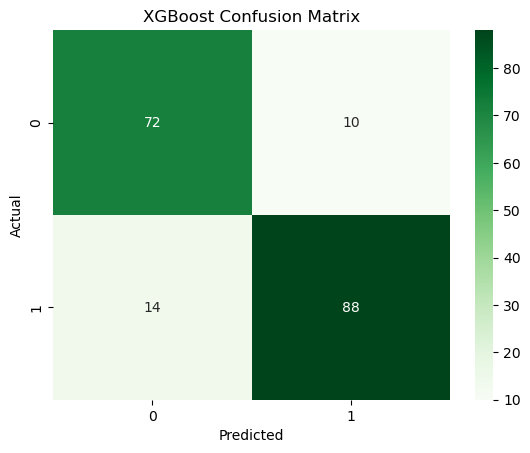

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        82
           1       0.90      0.86      0.88       102

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

XGBoost ROC-AUC Score: 0.923


In [84]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("XGBoost ROC-AUC Score:", round(roc_auc_xgb, 3))

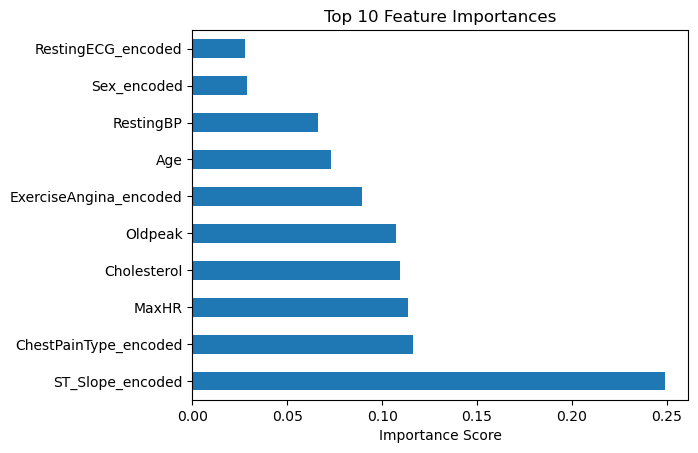

In [86]:
# Feature Importance
import matplotlib.pyplot as plt

# If you know the original feature names
feature_names = ['Age', 'Sex_encoded','ChestPainType_encoded', 'RestingBP', 'Cholesterol', 
               'FastingBS','RestingECG_encoded','MaxHR', 'ExerciseAngina_encoded','Oldpeak','ST_Slope_encoded']  
# Create a Series with correct index
importances = pd.Series(model.feature_importances_, index=feature_names)

# Plot top 10
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

In [87]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(scale_pos_weight=2216/7784, random_state=42)
xgb_model.fit(X_train, y_train)

#### scale_pos_weight = (negative / positive) — helps XGBoost focus more on the minority class

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [88]:
# Predict labels and probabilities
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

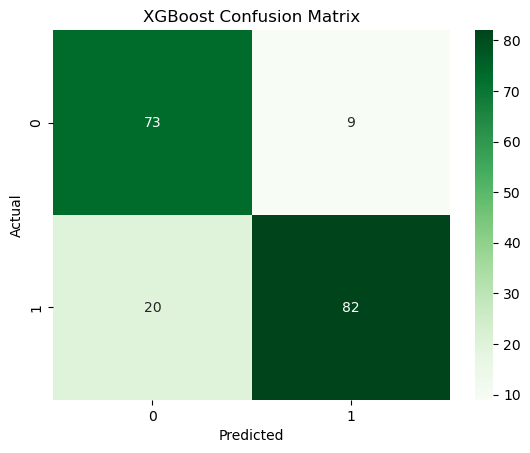

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        82
           1       0.90      0.80      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

XGBoost ROC-AUC Score: 0.925


In [89]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Greens")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# ROC-AUC Score
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("XGBoost ROC-AUC Score:", round(roc_auc_xgb, 3))

In [91]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Train XGBoost on balanced data
xgb_model_sm = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model_sm.fit(X_train_sm, y_train_sm)

# Predict and evaluate
y_pred_sm = xgb_model_sm.predict(X_test)
y_prob_sm = xgb_model_sm.predict_proba(X_test)[:, 1]

# Classification report
print("SMOTE + XGBoost Classification Report:")
print(classification_report(y_test, y_pred_sm))

# ROC-AUC
roc_auc_sm = roc_auc_score(y_test, y_prob_sm)
print("SMOTE + XGBoost ROC-AUC Score:", round(roc_auc_sm, 3))

SMOTE + XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        82
           1       0.87      0.83      0.85       102

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

SMOTE + XGBoost ROC-AUC Score: 0.913


In [ ]:
##scale_pos_weight = count_negative / count_positive  = 2216 / 7784 ≈ 0.285

In [92]:
xgb_model_wt = XGBClassifier(
    scale_pos_weight=0.285, 
    eval_metric='logloss',
    random_state=42
)
xgb_model_wt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [93]:
# Predict and evaluate
y_pred_sm = xgb_model_wt.predict(X_test)
y_prob_sm = xgb_model_wt.predict_proba(X_test)[:, 1]

# Classification report
print("SMOTE + XGBoost Classification Report:")
print(classification_report(y_test, y_pred_sm))

# ROC-AUC
roc_auc_sm = roc_auc_score(y_test, y_prob_sm)
print("SMOTE + XGBoost ROC-AUC Score:", round(roc_auc_sm, 3))

SMOTE + XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        82
           1       0.90      0.79      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

SMOTE + XGBoost ROC-AUC Score: 0.925


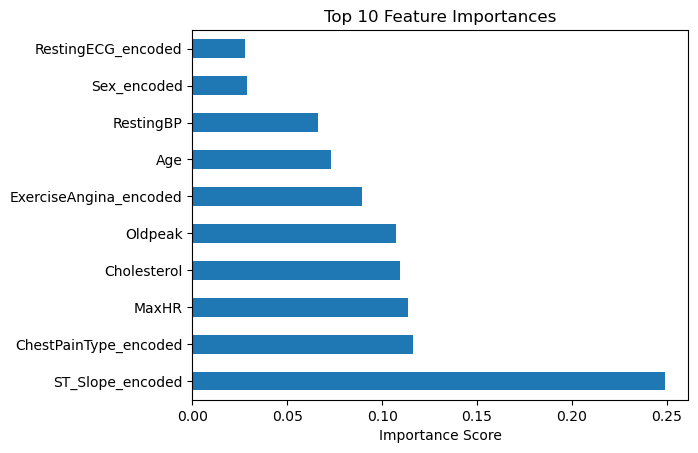

In [95]:
# Feature Importance
import matplotlib.pyplot as plt

# If you know the original feature names
feature_names = ['Age', 'Sex_encoded','ChestPainType_encoded', 'RestingBP', 'Cholesterol', 
               'FastingBS','RestingECG_encoded','MaxHR', 'ExerciseAngina_encoded','Oldpeak','ST_Slope_encoded']  
# Create a Series with correct index
importances = pd.Series(model.feature_importances_, index=feature_names)

# Plot top 10
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.show()

In [96]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_lr))
print("LogReg ROC-AUC:", roc_auc_score(y_test, y_prob_lr))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83        82
           1       0.86      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

LogReg ROC-AUC: 0.8962219033955046


In [97]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'scale_pos_weight': [0.25, 0.5, 1, 2]
}

# Base XGBoost model
xgb_base = XGBClassifier(
    eval_metric='logloss',
    random_state=42
)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_grid,
    n_iter=25,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model evaluation
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# Print results
print("Best XGBoost Classification Report:")
print(classification_report(y_test, y_pred))
print("Best XGBoost ROC-AUC:", round(roc_auc_score(y_test, y_prob), 3))

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.77      0.84        82
           1       0.84      0.95      0.89       102

    accuracy                           0.87       184
   macro avg       0.88      0.86      0.86       184
weighted avg       0.88      0.87      0.87       184

Best XGBoost ROC-AUC: 0.925
